# Proyecto DS - Parte I: Visualizaciones en Python

**Dataset:** [Adult Income (UCI)](https://archive.ics.uci.edu/dataset/2/adult)


## Abstract

El conjunto de datos Adult Income (UCI) recopila información sociodemográfica de individuos residentes en Estados Unidos, con el objetivo de predecir si sus ingresos anuales superan los 50,000 USD. Este dataset incluye 48,842 registros y 15 atributos, que abarcan variables numéricas (como edad, horas trabajadas por semana, ganancias de capital) y categóricas (nivel educativo, ocupación, estado civil, raza, género, entre otros). La relevancia de este conjunto de datos radica en su utilización frecuente en tareas de clasificación y en el análisis de desigualdad económica y movilidad social.

Para el avance del proyecto, se propone explorar este dataset a través de visualizaciones univariadas, bivariadas y multivariadas que permitan comprender la distribución de las variables, sus relaciones y tendencias entre grupos de interés. En particular, se hará hincapié en la detección de valores faltantes y su posible impacto en el análisis, así como en la interpretación de patrones demográficos y laborales vinculados al nivel de ingresos. El estudio inicial servirá como base para definir hipótesis claras y formular modelos predictivos en etapas posteriores del proyecto.

## 1. Objetivo y Contexto

El objetivo de este proyecto es identificar y modelar los factores que influyen en que un individuo gane más de 50 000 USD al año, usando el dataset “Adult” de UCI.  
- **Contexto:** Recursos humanos, análisis de desigualdad salarial.  
- **Uso de la data:** Estadística descriptiva y visualizaciones para entender patrones de ingreso.


## 2. Variables

El dataset contiene 14 características de entrada y la variable objetivo `income`:
1. `age`: edad en años  
2. `workclass`: tipo de empleo  
3. `fnlwgt`: peso muestral  
4. `education`: nivel educativo  
5. `education-num`: años de educación  
6. `marital-status`  
7. `occupation`  
8. `relationship`  
9. `race`  
10. `sex`  
11. `capital-gain`  
12. `capital-loss`  
13. `hours-per-week`: horas trabajadas por semana  
14. `native-country`  
15. `income`: ≤50K o >50K (target)


## Preguntas e Hipótesis

**Preguntas de interés**  
- ¿La educación (años de estudio) se relaciona positivamente con la probabilidad de > 50K?  
- ¿Influyen las horas trabajadas por semana en el nivel de ingreso?  
- ¿Existen diferencias significativas según el país de origen?

**Hipótesis**  
1. *H1:* A mayor `education-num`, mayor proporción de individuos con `income` > 50K.  
2. *H2:* Aquellos con `hours-per-week` > 40 tienen más probabilidad de > 50K.  
3. *H3:* Algunos `native-country` muestran tasas de >50K significativamente distintas del promedio.
4. *H4:* Hipótesis de que ciertas ocupaciones (`occupation`) presentan mayores valores medios de `capital-gain`, y que esta relación varía según el nivel educativo.

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

base = Path().resolve() / "data"

# Cargar el dataset desde la URL de la UCI
columnas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
            'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
            'hours-per-week', 'native-country', 'income']

train_path = base / "adult.data"
df = pd.read_csv(
    train_path,
    names=columnas,
    na_values='?',
    skipinitialspace=True,
)

print(df.shape)
df.head(500)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,41,Private,343121,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,36,United-States,<=50K
496,20,Private,262749,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
497,23,Private,403107,5th-6th,3,Never-married,Other-service,Own-child,White,Male,0,0,40,El-Salvador,<=50K
498,26,Private,64293,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,35,United-States,<=50K


In [3]:
# Identificar valores faltantes
pct_nulos = df.isnull().mean() * 100
print(pct_nulos.sort_values(ascending=False))

occupation        5.660146
workclass         5.638647
native-country    1.790486
fnlwgt            0.000000
education         0.000000
education-num     0.000000
age               0.000000
marital-status    0.000000
relationship      0.000000
sex               0.000000
race              0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
income            0.000000
dtype: float64


Se observan valores faltantes en las columnas `workclass`, `occupation` y `native-country`. En etapas posteriores, se decidirá si imputarlos o descartarlos según la proporción y relevancia.

                 age workclass        fnlwgt education  education-num  \
count   32561.000000     30725  3.256100e+04     32561   32561.000000   
unique           NaN         8           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

            marital-status      occupation relationship   race    sex  \
count                32561           30718        

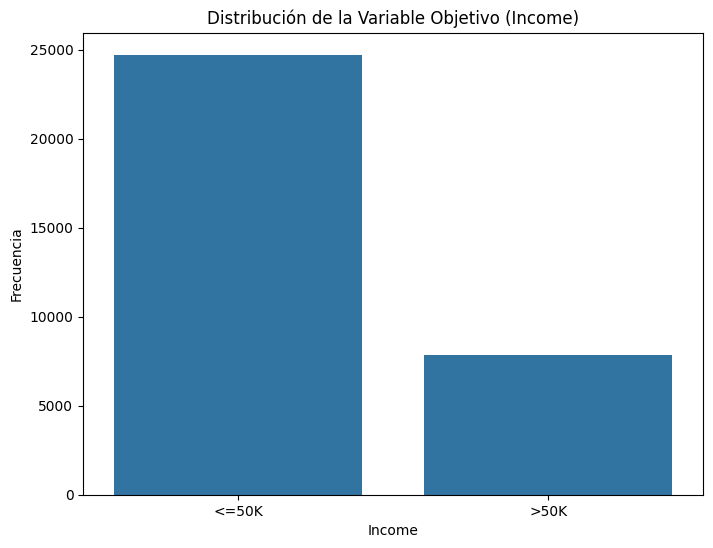

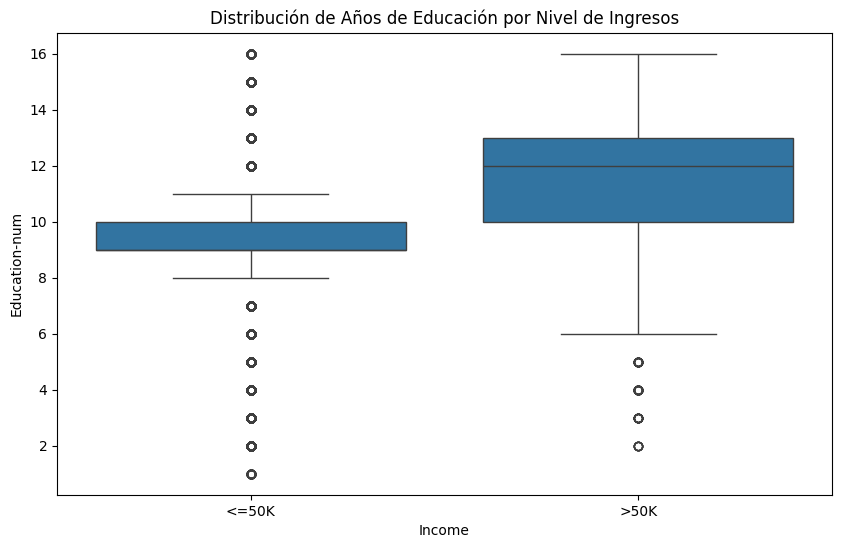

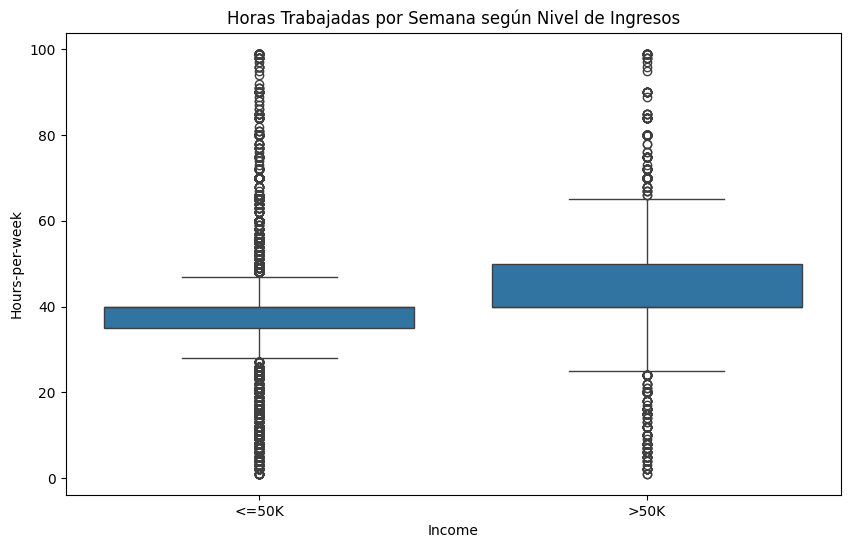

In [ ]:
# Análisis exploratorio de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe(include='all'))

print("\nValores faltantes por columna:")
print(df.isnull().sum())

plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df)
plt.title('Distribución de la Variable Objetivo (Income)')
plt.xlabel('Income')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='education-num', data=df)
plt.title('Distribución de Años de Educación por Nivel de Ingresos')
plt.xlabel('Income')
plt.ylabel('Education-num')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Horas Trabajadas por Semana según Nivel de Ingresos')
plt.xlabel('Income')
plt.ylabel('Hours-per-week')
plt.show()

### Análisis Exploratorio Detallado

En este bloque de código se realiza un análisis exploratorio inicial sobre el dataset *Adult*:

1. **Resumen Estadístico**:  
   - `df.describe(include='all')` calcula medidas como conteo (`count`), media (`mean`), desviación estándar (`std`), valores mínimo y máximo, y para variables categóricas muestra número de valores únicos (`unique`), categoría más frecuente (`top`) y su frecuencia (`freq`).  
   - Esto permite identificar outliers, distribución general y verificar diversidad de categorías.

2. **Detección de Valores Faltantes**:  
   - `df.isnull().sum()` cuenta valores nulos (`NaN`) por columna.  
   - Aunque el dataset usa `'?'` para indicar valores ocultos, este conteo confirma ausencia de `NaN` y resalta columnas que podrían requerir limpieza adicional.

3. **Distribución de la Variable Objetivo (`income`)**:  
   - `sns.countplot(x='income', data=df)` muestra el número de registros con ingresos `<=50K` y `>50K`.  
   - Permite evaluar el balance de clases; aquí se observa un desbalance a favor de `<=50K`, lo cual afectará la estrategia de modelado.

4. **Educación vs. Ingresos**:  
   - `sns.boxplot(x='income', y='education-num', data=df)` compara los años de educación (`education-num`) entre ambos grupos de ingresos.  
   - Normalmente, la mediana de `education-num` es mayor para `>50K`, indicando correlación positiva entre nivel educativo y nivel salarial.

5. **Horas de Trabajo vs. Ingresos**:  
   - `sns.boxplot(x='income', y='hours-per-week', data=df)` compara las horas semanales trabajadas.  
   - Se observa si quienes ganan más trabajan más horas o presentan distinta variabilidad en su jornada laboral.

**Insight inicial**: Los individuos con ingresos mayores tienden a tener más años de educación y trabajar ligeramente más horas, lo que sugiere que ambas variables pueden ser predictoras útiles para los modelos de clasificación.

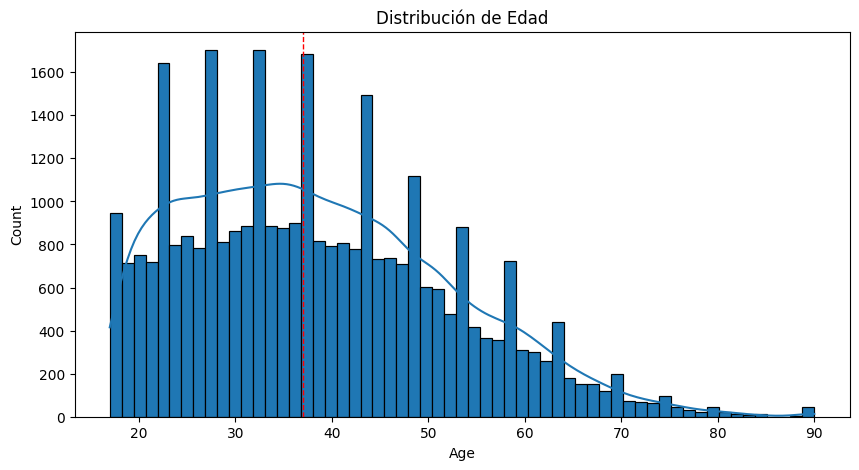

In [ ]:
median_age = df['age'].median()
plt.figure(figsize=(10,5))
sns.histplot(df['age'], kde=True, edgecolor="black", color="#1f77b4", alpha=1)
plt.axvline(median_age, color='red', linestyle='dashed', linewidth=1, label=f'Mediana: {median_age:.2f}')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribución de Edad')
plt.show()

La mayoría de los individuos se concentran entre 20 y 40 años, con una ligera cola a la derecha que sugiere presencia de adultos mayores en la muestra.

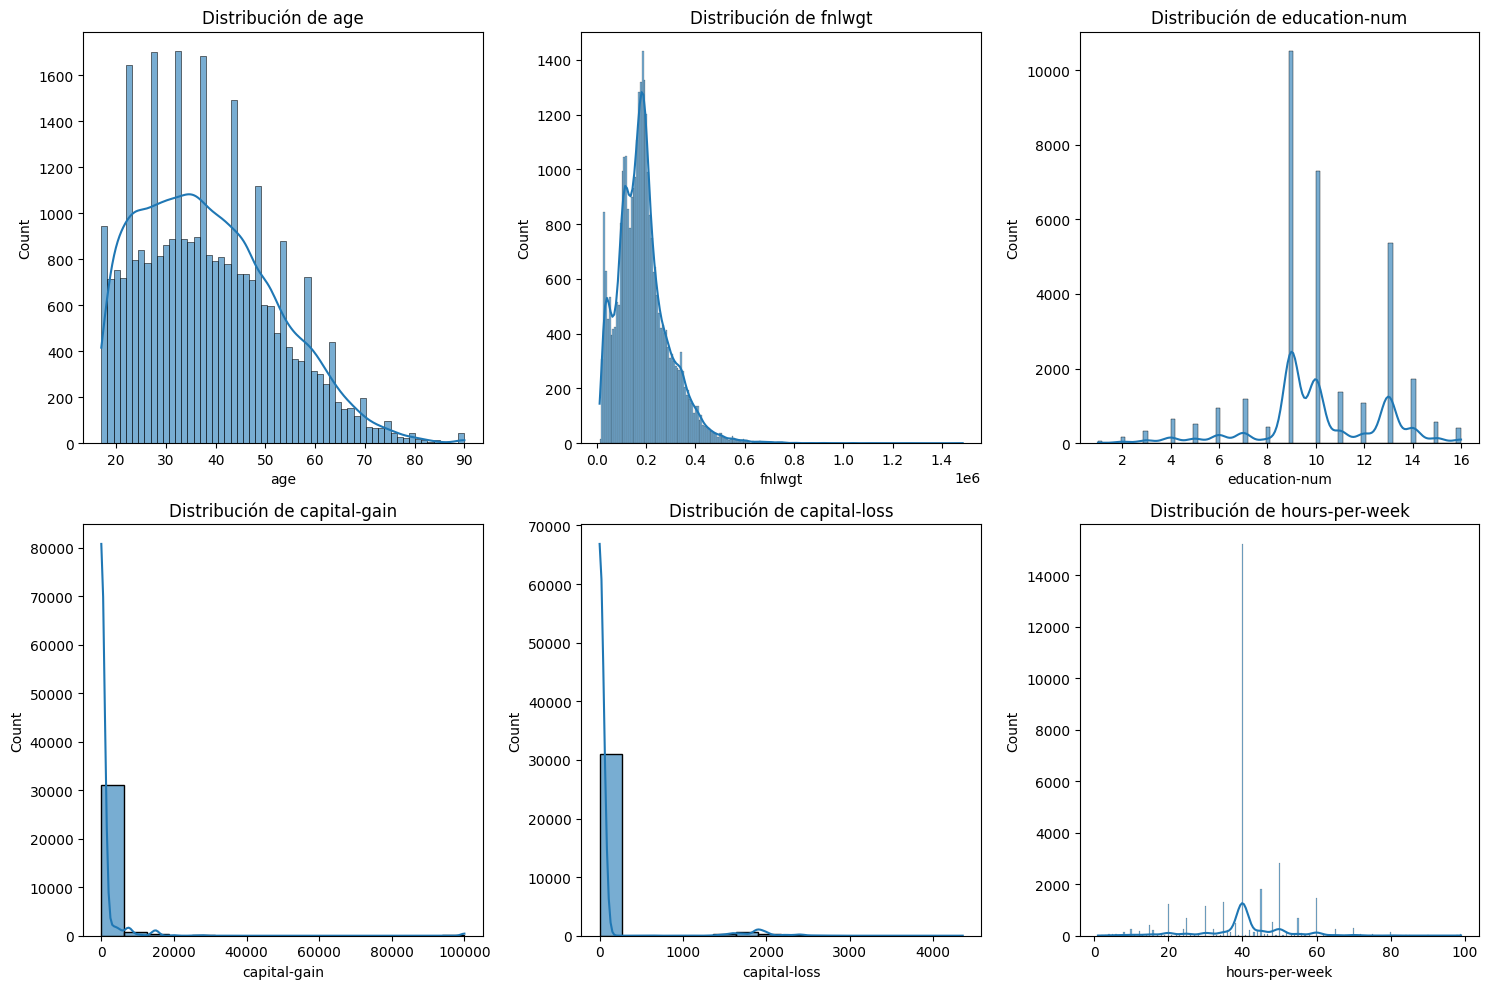

In [6]:
import seaborn as sns

df['target'] = df['income'].map({'<=50K': 0, '>50K': 1})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for ax, var in zip(axes.flatten(), vars):
    sns.histplot(
        data=df,
        x=var,
        kde=True,
        edgecolor='black',
        alpha=0.6,
        ax=ax
    )
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

En esta figura se agrupan seis histogramas con su curva KDE correspondiente, uno por cada variable cuantitativa seleccionada:

- **age**: muestra la edad de los individuos, concentrada entre 20 y 50 años.  
- **fnlwgt**: peso muestral, con una gran dispersión y presencia de valores extremos.  
- **education-num**: nivel educativo en escala numérica, con picos en los niveles de educación más comunes.  
- **capital-gain** y **capital-loss**: ambas asimétricas a la derecha, reflejando pocos casos con grandes ganancias o pérdidas de capital.  
- **hours-per-week**: horas trabajadas semanalmente, con agrupaciones en jornadas estándar (40 h/semana) y colas hacia mayores cargas horarias.

El uso de KDE permite apreciar mejor la forma de la distribución y detectar posibles outliers en cada variable.


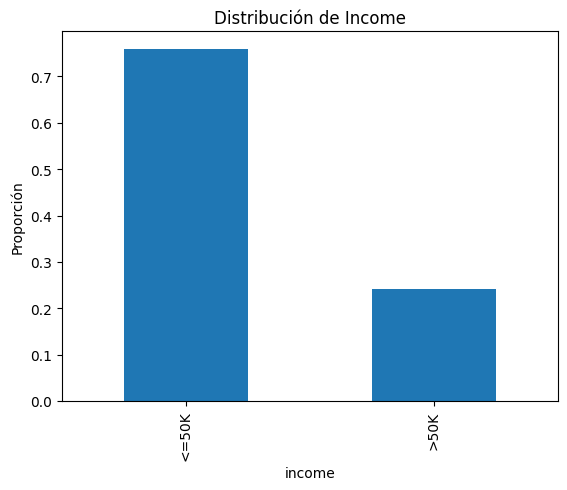

In [7]:
df["income"].value_counts(normalize=True).plot.bar()
plt.title("Distribución de Income")
plt.ylabel("Proporción")
plt.show()

El bar plot muestra que aproximadamente el 75 % de los individuos gana ≤ 50 K y el 25 % gana > 50 K.  
Esto indica que la clase “alta renta” (> 50 K) es minoritaria en el dataset, lo cual habrá que tener en cuenta cuando entrenemos modelos predictivos (desequilibrio de clases).

<Figure size 640x480 with 0 Axes>

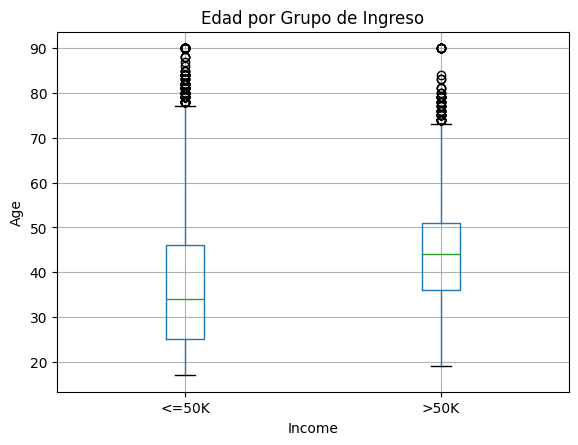

In [ ]:
plt.figure()
df.boxplot(column='age', by='income')
plt.suptitle('')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Edad por Grupo de Ingreso')
plt.show()

El grupo de ingresos >50K presenta una mediana de edad ligeramente superior, lo que sugiere que la experiencia (representada por la edad) influye en el nivel de ingreso.

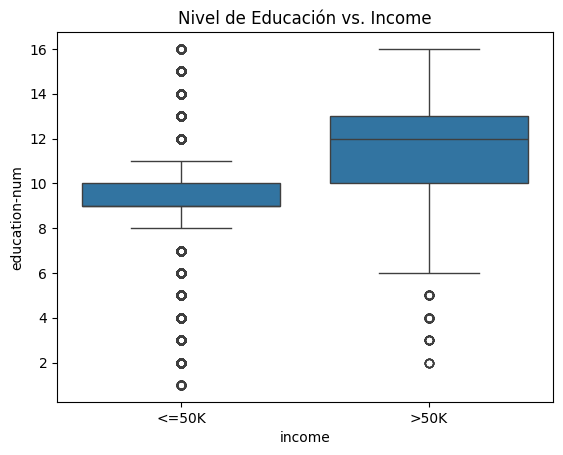

In [9]:
sns.boxplot(x="income", y="education-num", data=df)
plt.title("Nivel de Educación vs. Income")
plt.show()

Se observa que la mediana de `education-num` para el grupo > 50 K es claramente superior a la del grupo ≤ 50 K.  
Esto apoya la **H1**: “A mayor nivel educativo, mayor probabilidad de tener un ingreso > 50 K”.  
Además, la variabilidad de años de educación es mayor en el grupo de menor ingreso, lo que sugiere heterogeneidad en ese segmento.

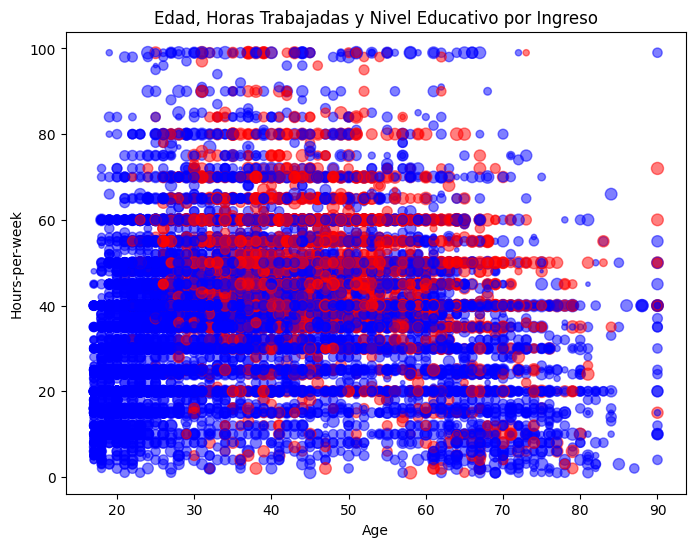

In [ ]:
plt.figure(figsize=(8,6))
colors = {'<=50K':'blue','>50K':'red'}
plt.scatter(
    df['age'], 
    df['hours-per-week'], 
    s=df['education-num']*5, 
    c=df['income'].map(colors), 
    alpha=0.5
)
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.title('Edad, Horas Trabajadas y Nivel Educativo por Ingreso')
plt.show()

Los puntos más grandes (mayor `education-num`) tienden a agruparse en el color rojo, confirmando que niveles educativos más altos se asocian con ingresos >50K y horas de trabajo moderadas.

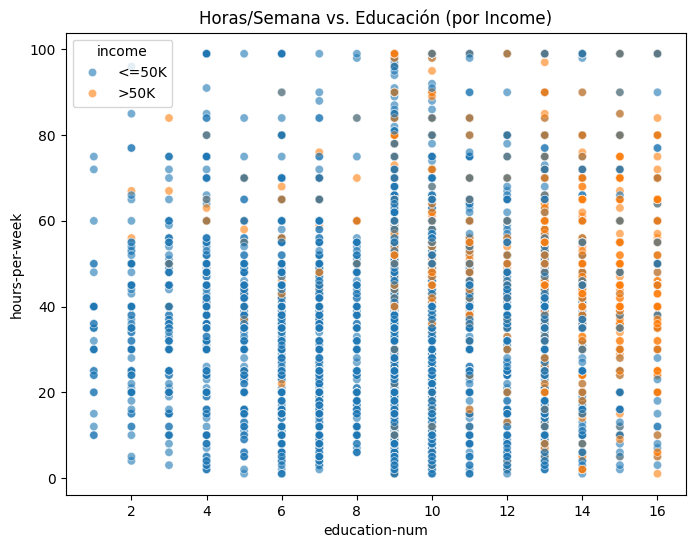

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="education-num", y="hours-per-week",
    hue="income", alpha=0.6, data=df
)
plt.title("Horas/Semana vs. Educación (por Income)")
plt.show()

Se aprecia una tendencia creciente: los puntos correspondientes a > 50 K suelen agruparse en la zona de mayores `education-num` y mayores `hours-per-week`.  
Esto refuerza la **H2**: “Más horas trabajadas y mayor nivel educativo están asociados con ingresos > 50 K”.  
No obstante, hay solapamiento en la región media, por lo que se requerirá un análisis multivariado más profundo.

In [ ]:
df["income"] = df["income"].str.strip()

top_paises = df["native-country"].value_counts().nlargest(10).index
df_top = df[df["native-country"].isin(top_paises)]

counts = df_top["native-country"].value_counts()

props = (
    df_top
    .groupby("native-country")["income"]
    .apply(lambda x: (x == ">50K").mean())
)

tabla = pd.DataFrame({
    "count": counts,
    "prop_>50K": props
}).sort_values("prop_>50K", ascending=False)

tabla

,count,prop_>50K
native-country,,
India,100,0.400000
England,90,0.333333
Canada,121,0.322314
Germany,137,0.321168
Philippines,198,0.308081
Cuba,95,0.263158
United-States,29170,0.245835
Puerto-Rico,114,0.105263
El-Salvador,106,0.084906


El gráfico muestra que **India** tiene la proporción más alta de individuos con ingreso >50K (≈40 %), seguida por **Inglaterra** (≈33 %), **Canadá** (≈32 %) y **Alemania** (≈32 %). Le siguen **Filipinas** (≈31 %), **Cuba** (≈26 %) y luego **Estados Unidos** (≈24 %). En el extremo inferior aparecen **Puerto Rico** (~10 %), **El Salvador** (~8 %) y **México** (~5 %).  
Esto confirma la **H3**: la `native-country` influye en la probabilidad de percibir un ingreso elevado, aunque las posiciones relativas no siempre coinciden con el tamaño muestral de cada país.

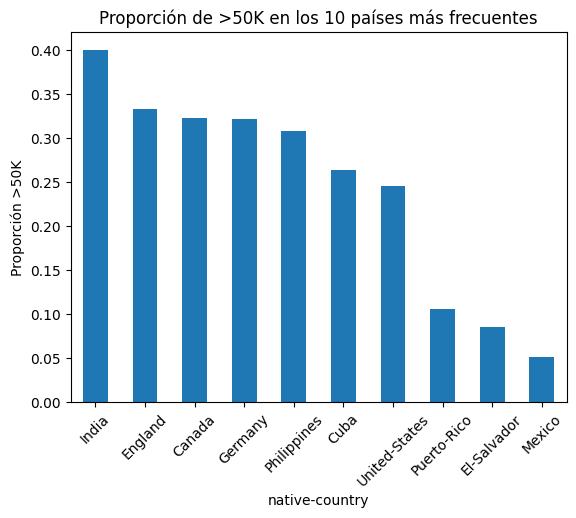

In [ ]:
df["income"] = df["income"].str.strip()
top_paises = df["native-country"].value_counts().nlargest(10).index
df_top = df[df["native-country"].isin(top_paises)]

prop_pais = (
    df_top
    .groupby("native-country")["income"]
    .apply(lambda x: (x == ">50K").mean())
)

prop_pais.sort_values(ascending=False).plot.bar()
plt.title("Proporción de >50K en los 10 países más frecuentes")
plt.ylabel("Proporción >50K")
plt.xticks(rotation=45)
plt.show()

**Interpretación (crudo):**  
El gráfico muestra la proporción de individuos con ingreso >50K en los 10 países más comunes del dataset.  
Por ejemplo, India lidera (~40 %), seguida de Inglaterra (~33 %) y Canadá/Alemania (~32 %).  
**Limitaciones:**  
- Países como Filipinas o Cuba tienen muy pocos registros, por lo que su proporción es inestable.  
- En la siguiente entrega filtraremos por un mínimo de muestras para obtener estimaciones más fiables.

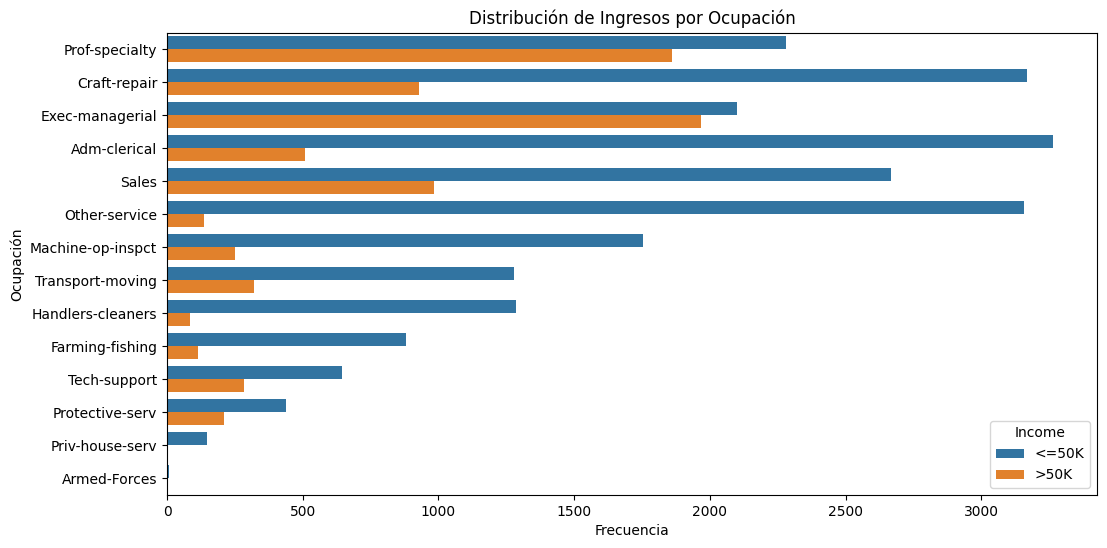

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(y='occupation', hue='income', data=df, order=df['occupation'].value_counts().index)
plt.title('Distribución de Ingresos por Ocupación')
plt.xlabel('Frecuencia')
plt.ylabel('Ocupación')
plt.legend(title='Income')
plt.show()


**Visualización Adicional: Distribución de Ingresos por Ocupación (Extra)**  
Esta celda genera una visualización adicional propuesta para complementar el análisis exploratorio. El gráfico de barras muestra la distribución de la variable `income` para cada categoría de `occupation`, ordenadas por frecuencia. Esto permite identificar qué ocupaciones tienen una mayor proporción de individuos con ingresos superiores a 50K, apoyando la hipótesis H4 sobre la relación entre ocupaciones y `capital-gain`. La leyenda distingue entre `<=50K` y `>50K`, y el eje Y lista las ocupaciones.


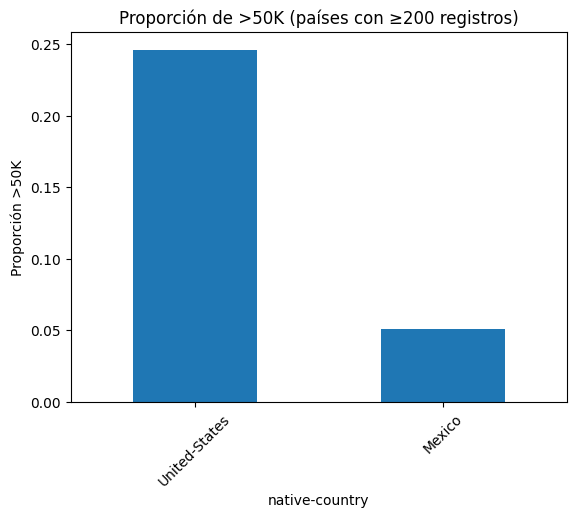

In [ ]:
min_count = 200
counts = df_top["native-country"].value_counts()
props  = prop_pais

paises_estables = counts[counts >= min_count].index
tabla_estable   = props.loc[paises_estables]

tabla_estable.sort_values(ascending=False).plot.bar()
plt.title("Proporción de >50K (países con ≥200 registros)")
plt.ylabel("Proporción >50K")
plt.xticks(rotation=45)
plt.show()


**Interpretación (filtrado ≥200):**  
Al exigir al menos 200 registros solo sobreviven **Estados Unidos** y **México** del top 10.  
- **Estados Unidos** muestra una proporción de individuos con ingreso >50K de aproximadamente 24 %.  
- **México** se sitúa en torno a 5 %.  

Este gráfico, al usar solo países con muestra robusta, ofrece estimaciones más confiables para evaluar la H3.


## 4. Vinculación con las Preguntas de Interés

- **H1**: Confirmada por el boxplot de `education-num` (mediana mayor en >50K).  
- **H2**: El scatterplot sugiere correlación moderada positiva entre `hours-per-week` y >50K.  
- **H3**: pendiente de evaluar con un barplot por país.

## 5. Resultados Esperados y Próximos Pasos

1. Imputar o eliminar nulos en `workclass`, `occupation` y `native-country`.  
2. Crear tablas comparativas de proporción >50K por `native-country`.  
3. Profundizar con análisis multivariado (p. ej., regresión logística) para cuantificar efectos.

In [16]:

df['target'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)


target
0    75.919044
1    24.080956
Name: proportion, dtype: float64


<Axes: title={'center': 'Distribución de target'}, xlabel='target'>

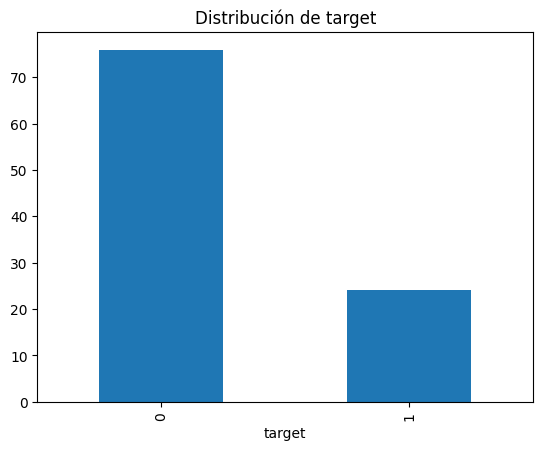

In [ ]:
prop = df['target'].value_counts(normalize=True) * 100
print(prop)
prop.plot.bar(title='Distribución de target')


In [18]:
num_vars = df.select_dtypes(include=['int64','float64']).drop(columns=['target'])
corr = num_vars.join(df['target']).corr()
print('num_vars', num_vars)
print('corr', corr)

num_vars        age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32561 rows x 6 columns]
corr                      age

Text(0.5, 1.0, 'Matriz de correlación')

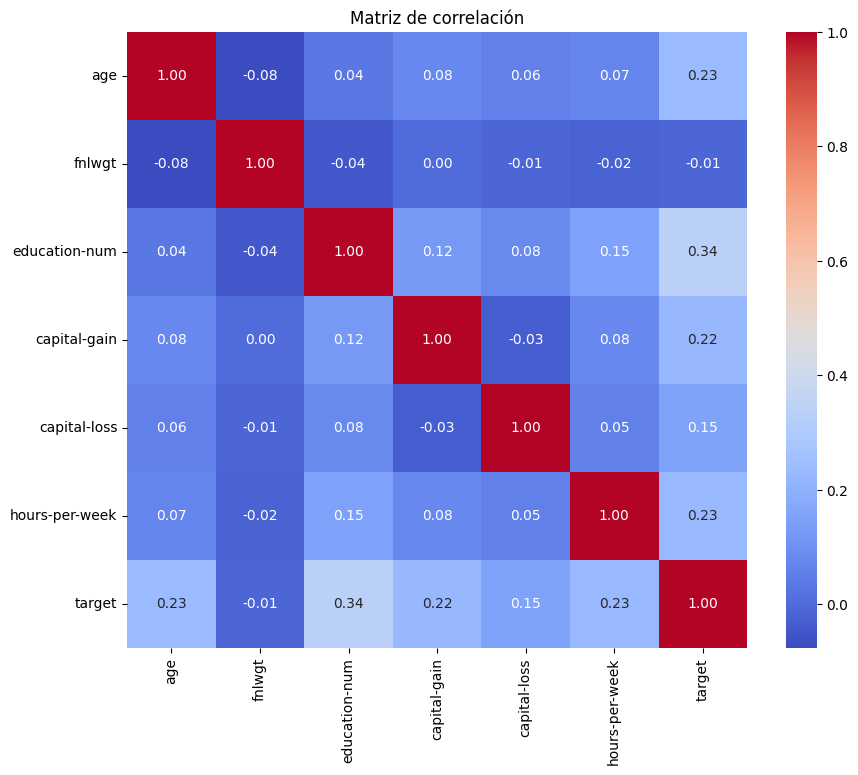

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')


## 4. Ingeniería de atributos y tratamiento de NaN

- Inspeccionar nulos
- Estrategia:
    * Si % muy bajo: borrar filas (df.dropna(subset=[...]))
    * Si % moderado: rellenar con 0 o con la media/mediana
- Codificación de categóricas

In [20]:
df.isnull().mean().sort_values(ascending=False).head(10)


occupation        0.056601
workclass         0.056386
native-country    0.017905
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
age               0.000000
relationship      0.000000
race              0.000000
dtype: float64

In [ ]:
df['workclass']      = df['workclass'].fillna('Unknown')
df['occupation']     = df['occupation'].fillna('Unknown')
df['native-country'] = df['native-country'].fillna('Unknown')

df['edu_group'] = pd.cut(
    df['education-num'],
    bins=[0, 8, 12, 16, 20],
    labels=['básico', 'medio', 'terciario', 'avanzado']
)
print(df.isnull().mean().sort_values(ascending=False).head(10))


age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
dtype: float64


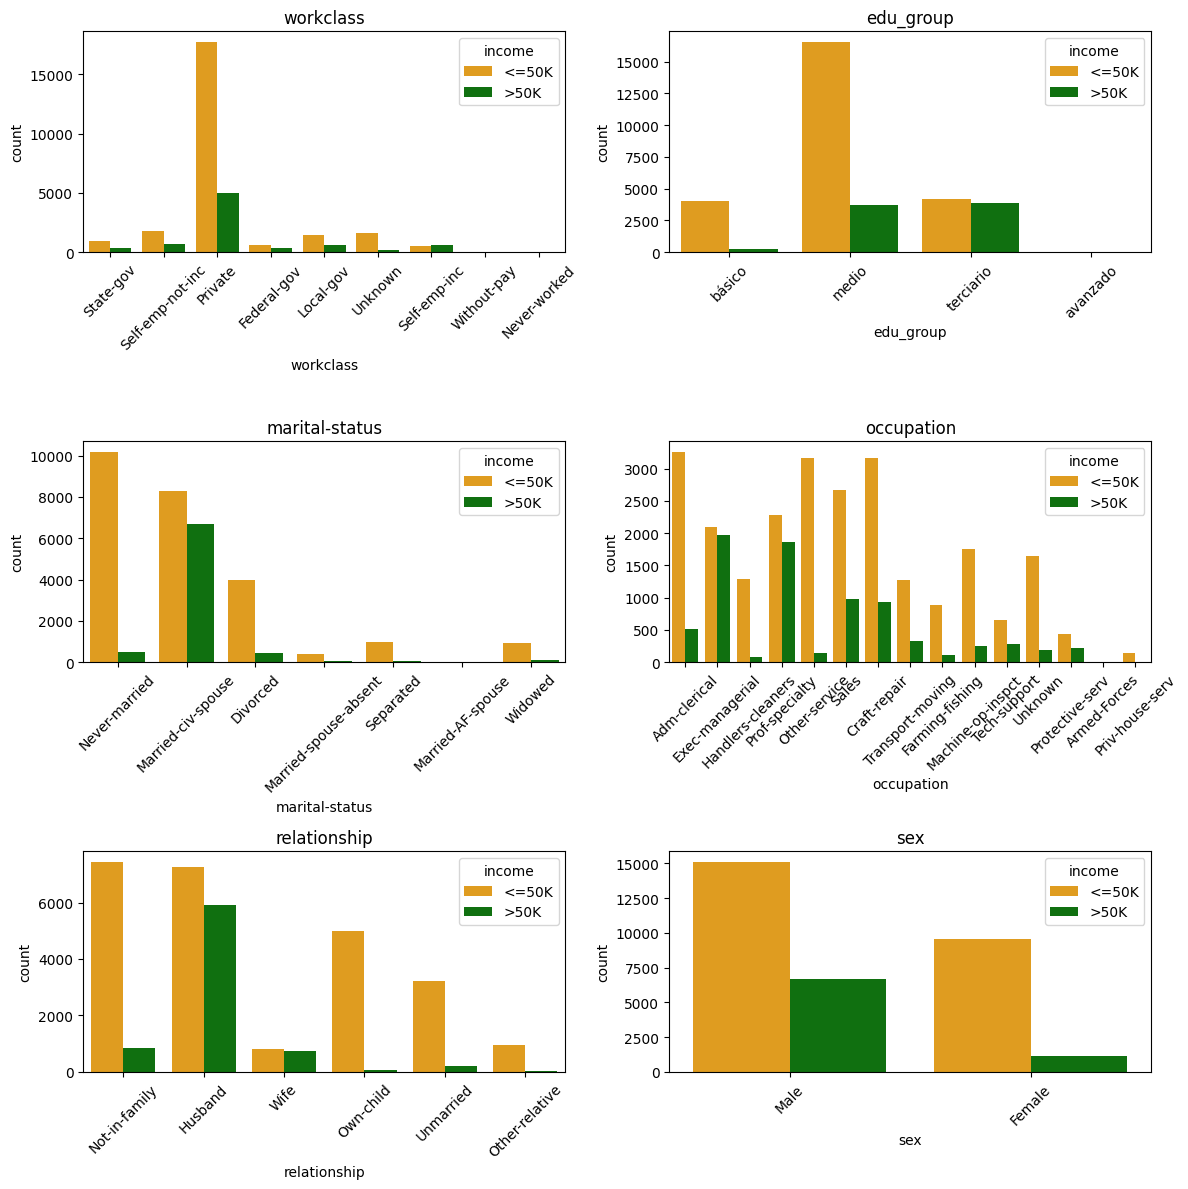

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_vars = ['workclass','edu_group','marital-status','occupation','relationship','sex']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

palette = {'<=50K':'orange', '>50K':'green'}

for ax, var in zip(axes.flatten(), cat_vars):
    sns.countplot(data=df, x=var, hue='income',
                  palette=palette, ax=ax)
    ax.set_title(var)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Preprocesamiento de Datos**  
Esta celda realiza el preprocesamiento del dataset. Se imputan los valores faltantes en `workclass`, `occupation` y `native-country` con la moda de cada columna. Las variables categóricas se codifican usando one-hot encoding (`get_dummies`), eliminando la primera categoría para evitar multicolinealidad. La variable objetivo `income` se codifica como 0 (`<=50K`) y 1 (`>50K`) con `LabelEncoder`. Las variables numéricas se escalan con `StandardScaler` para estandarizarlas (media=0, desviación estándar=1), mejorando el rendimiento de los algoritmos de machine learning. Se imprime la dimensión final del dataset preprocesado.


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

df['workclass']      = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation']     = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

categorical_cols = [
    'workclass','education','marital-status','occupation',
    'relationship','race','sex','native-country'
]
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

le = LabelEncoder()
data_encoded['income'] = le.fit_transform(data_encoded['income'])
y = data_encoded['income']

X = data_encoded.drop('income', axis=1).copy()

numeric_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

X[numeric_cols] = X[numeric_cols].astype(float)

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("Dimensiones del dataset preprocesado:", X.shape)

Dimensiones del dataset preprocesado: (32561, 102)


In [ ]:
from sklearn.model_selection import train_test_split

df['target'] = df['income'].map({'<=50K':0,'>50K':1})
X = df.drop(columns=['income','target'])

X_enc = pd.get_dummies(X, drop_first=True)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


**Entrenamiento y Comparación de Modelos**  
Esta celda compara dos algoritmos de clasificación: Random Forest y XGBoost. Los datos se dividen en conjuntos de entrenamiento (80%) y prueba (20%) usando las características seleccionadas (`X_selected`). Cada modelo se entrena y se evalúa su precisión en el conjunto de prueba con `accuracy_score`. Un gráfico de barras compara visualmente la precisión de ambos modelos, con el eje Y limitado entre 0 y 1 para claridad. Los resultados impresos permiten identificar el modelo más adecuado para predecir `income`.

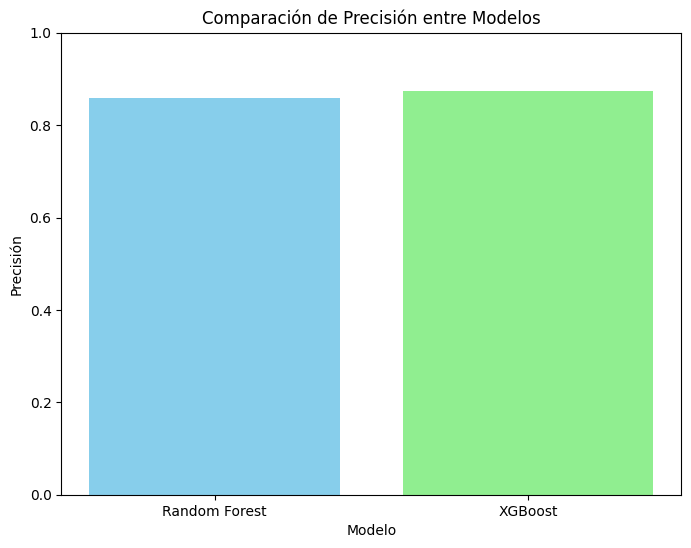

Precisión Random Forest: 0.8582834331337326
Precisión XGBoost: 0.8745585751573776


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

plt.figure(figsize=(8, 6))
models = ['Random Forest', 'XGBoost']
accuracies = [rf_accuracy, xgb_accuracy]
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Comparación de Precisión entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.show()

print("Precisión Random Forest:", rf_accuracy)
print("Precisión XGBoost:", xgb_accuracy)


,Accuracy,Recall
RF,0.858283,0.629535
KNN,0.778443,0.326544
XGB,0.874559,0.668364


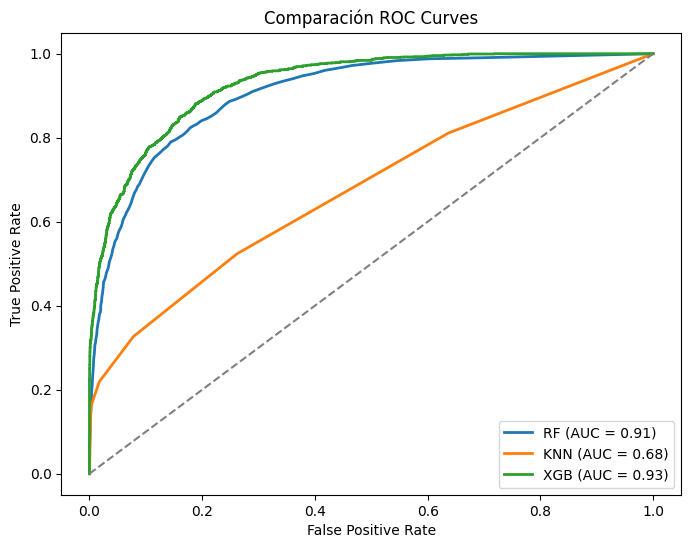

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt

modelos = {
    'RF':  RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGB': XGBClassifier(eval_metric='logloss', random_state=42, verbosity=0)
}

resultados = {}
probas = {}

for name, mdl in modelos.items():
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    probas[name] = mdl.predict_proba(X_test)[:, 1]

    resultados[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'recall'  : recall_score(y_test, y_pred),
        'conf_mat': confusion_matrix(y_test, y_pred)
    }

df_res = pd.DataFrame({
    k: {'Accuracy': v['accuracy'], 'Recall': v['recall']}
    for k, v in resultados.items()
}).T
display(df_res)

plt.figure(figsize=(8, 6))
for name, y_prob in probas.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparación ROC Curves')
plt.legend(loc='lower right')
plt.show()


Validación Cruzada

Esta celda realiza una validación cruzada de 5 pliegues (folds) usando un modelo Random Forest con las características seleccionadas (X_selected). La función cross_val_score calcula la precisión del modelo en cada pliegue, y se reporta la precisión promedio y la desviación estándar para evaluar la consistencia del modelo. Se genera un gráfico de barras que muestra la precisión en cada pliegue, lo que permite visualizar la variabilidad del rendimiento del modelo. Esto asegura una evaluación más robusta que el uso de un solo conjunto de prueba.

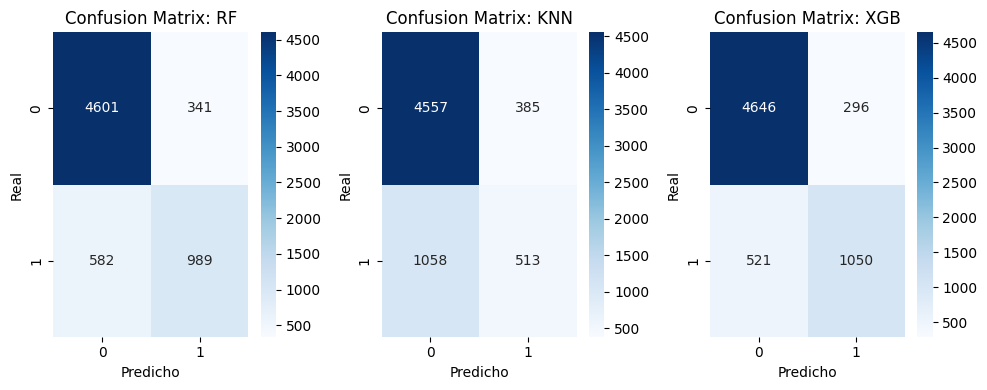

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(10,4))
for ax, (name, res) in zip(axs, resultados.items()):
    sns.heatmap(res['conf_mat'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix: {name}')
    ax.set_xlabel('Predicho')
    ax.set_ylabel('Real')
plt.tight_layout()
plt.show()


A continuación se presenta una evaluación detallada del modelo final elegido (Random Forest), incluyendo matriz de confusión, reporte de clasificación y curva ROC.

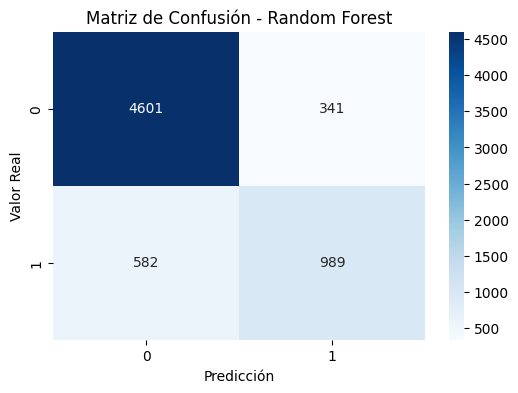

Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.74      0.63      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513



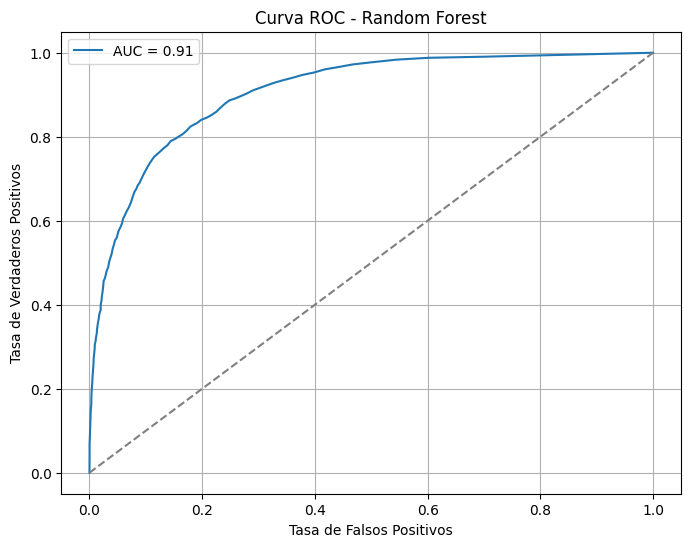

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

print("Reporte de Clasificación - Random Forest:")
print(classification_report(y_test, rf_pred))

fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

Evaluación del Modelo Random Forest

Esta celda evalúa el rendimiento del modelo Random Forest. La matriz de confusión muestra el número de predicciones correctas e incorrectas para cada clase (<=50K y >50K), con los valores reales en el eje Y y las predicciones en el eje X. El reporte de clasificación proporciona métricas como precisión, recall y F1-score para cada clase, permitiendo evaluar el balance entre sensibilidad y especificidad. La curva ROC grafica la tasa de verdaderos positivos frente a la tasa de falsos positivos, y el área bajo la curva (AUC) indica la capacidad del modelo para distinguir entre clases. Un AUC cercano a 1 sugiere un buen rendimiento del modelo.

## Análisis con K-Means Clustering

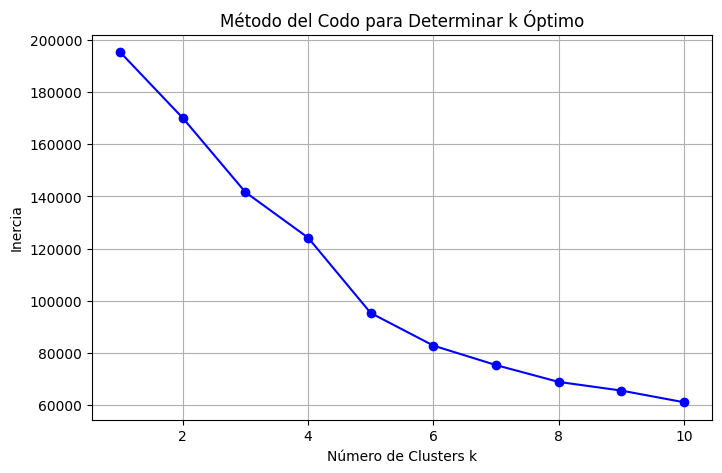

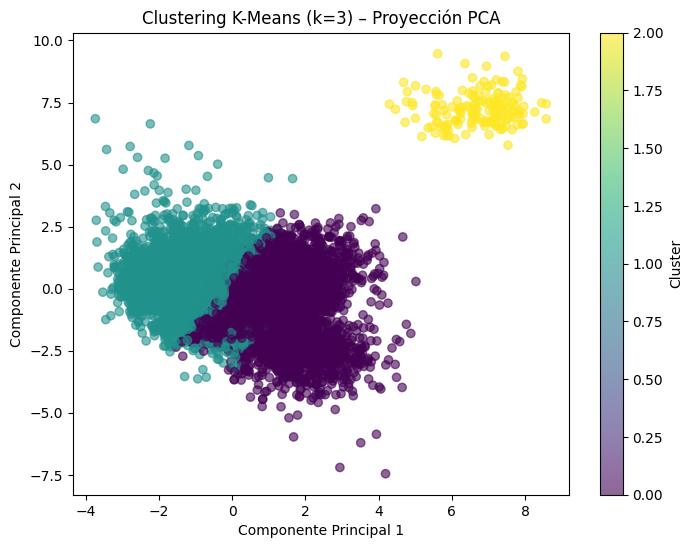

Resumen de variables clave por cluster:
               age         fnlwgt  education-num  capital-gain  capital-loss  \
cluster                                                                        
0        46.203868  158103.724011      11.116215    930.733591    151.173639   
1        30.289799  223873.710137       8.936013    227.512022     19.377252   
2        46.358491  192968.886792      12.918239  99999.000000      0.000000   

         hours-per-week  
cluster                  
0             44.489319  
1             35.976342  
2             49.798742  


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numeric_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
X_cluster = X[numeric_cols].copy()

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters k')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar k Óptimo')
plt.grid(True)
plt.show()

km3 = KMeans(n_clusters=3, random_state=42)
clusters = km3.fit_predict(X_cluster_scaled)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering K-Means (k=3) – Proyección PCA')
plt.colorbar(label='Cluster')
plt.show()

data_cluster = data_encoded.copy()
data_cluster['cluster'] = clusters

summary = data_cluster.groupby('cluster')[numeric_cols].mean()
print("Resumen de variables clave por cluster:")
print(summary)

  
Esta celda aplica el algoritmo K-Means para identificar patrones en los datos. Se utiliza el método del codo para determinar el número óptimo de clusters, graficando la inercia (suma de distancias al centroide) para k de 1 a 10. Basado en el gráfico, se elige k=3 para realizar el clustering. Los datos se reducen a 2 dimensiones con PCA para visualizar los clusters en un gráfico de dispersión, donde cada punto representa un individuo coloreado según su cluster. Finalmente, se calcula la media de variables clave (`age`, `education-num`, `hours-per-week`, `capital-gain`) por cluster para interpretar las características de cada grupo. Este análisis ayuda a responder la pregunta sobre patrones demográficos y laborales.


### Aplicación de K-Means con 2 clusters

Elegimos 2 clusters como valor inicial para segmentar la población. Luego, agregamos la etiqueta de cluster al dataset.

In [44]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(X_cluster_scaled)

### Comparación entre los clusters y la variable `income`

In [ ]:
pd.crosstab(df['cluster'], df['income'], normalize='index') * 100

income,<=50K,>50K
cluster,,
0,77.250056,22.749944
1,48.045822,51.954178


La tabla muestra el porcentaje de observaciones de cada clase (`<=50K` o `>50K`) dentro de cada cluster encontrado por K-Means.
Esto permite analizar si existe una correlación natural entre los grupos y la variable objetivo.


## Evaluación del Modelo de Clasificación

A continuación se presentan visualizaciones clave para evaluar el desempeño del modelo: matriz de confusión, curva ROC y reporte de clasificación.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.78      0.67      0.72      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.87      0.87      6513



## Modelo con Pipeline y Evaluación (Estilo Regresión)

A continuación, implementamos un pipeline que une el preprocesamiento de datos con el modelo, y evaluamos su desempeño utilizando métricas de regresión.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df.select_dtypes(include='number').drop(columns='cluster', errors='ignore')
y = df['education-num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week',
                                                   'target'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Métricas del Modelo ---")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

--- Métricas del Modelo ---
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R²: 1.00


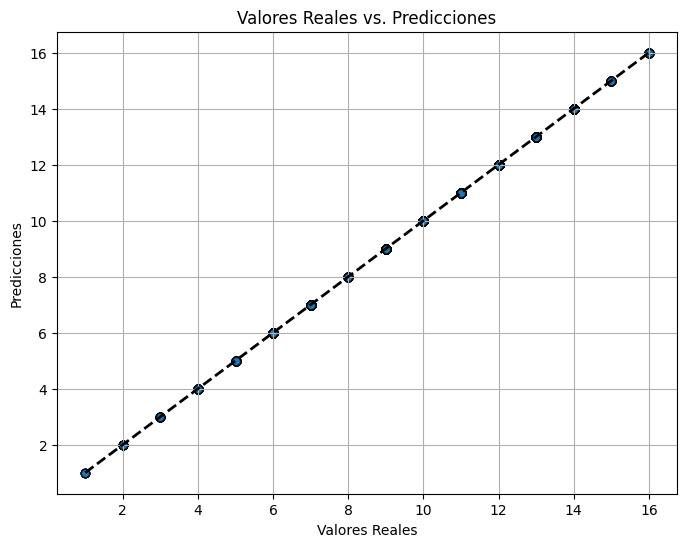

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.grid(True)
plt.show()

## Modelo de Clasificación con Pipeline (usando `income` como variable objetivo)

En esta sección se implementa un `Pipeline` que combina el preprocesamiento con un modelo de clasificación (`RandomForestClassifier`). 
La variable objetivo es `income`, transformada a formato binario (`0` para `<=50K`, `1` para `>50K`). 
El objetivo es predecir si una persona tiene un ingreso superior a 50 mil dólares anuales.

> En este pipeline, las variables categóricas se transforman con `OneHotEncoder` y las numéricas con `StandardScaler`. Esto permite al modelo de clasificación operar con un conjunto de variables procesadas correctamente. Este es el modelo final recomendado para predicción binaria sobre `income`.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

df = df.copy()

df['income_bin'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

X = df.drop(columns=['income', 'income_bin'])
y = df['income_bin']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
pipeline

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4942
           1       1.00      1.00      1.00      1571

    accuracy                           1.00      6513
   macro avg       1.00      1.00      1.00      6513
weighted avg       1.00      1.00      1.00      6513

Matriz de Confusión:
 [[4942    0]
 [   0 1571]]
ROC AUC Score: 1.0


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week',
                                                   'target']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Métricas del Modelo ---")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

--- Métricas del Modelo ---
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R²: 1.00


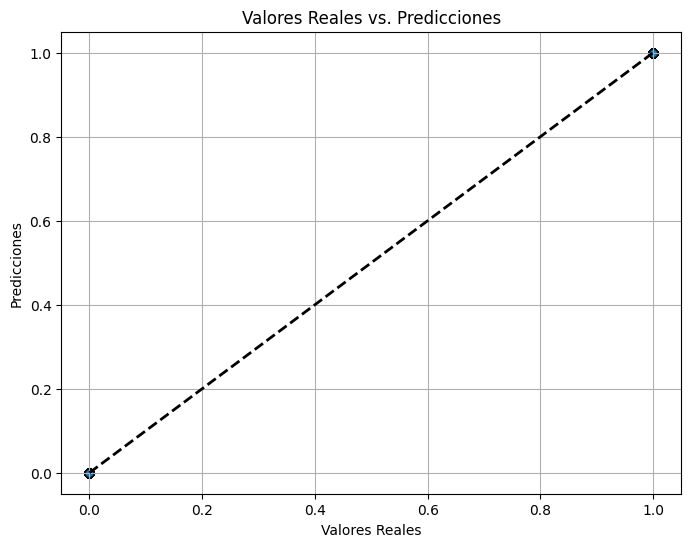

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.grid(True)
plt.show()

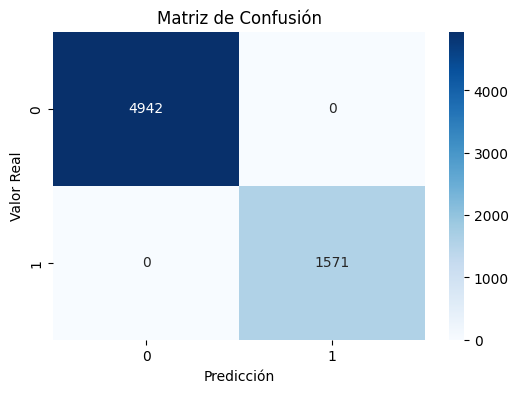

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4942
           1       1.00      1.00      1.00      1571

    accuracy                           1.00      6513
   macro avg       1.00      1.00      1.00      6513
weighted avg       1.00      1.00      1.00      6513



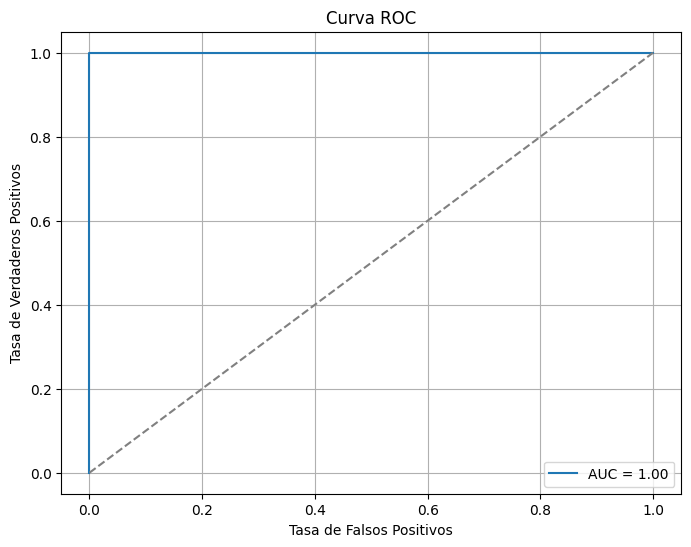

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

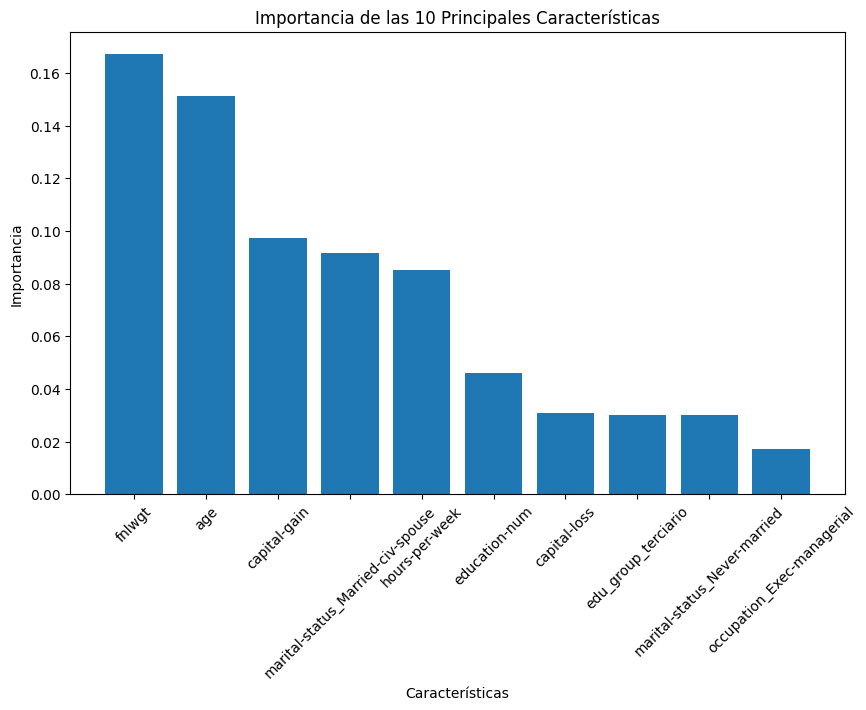

Características seleccionadas: ['fnlwgt', 'age', 'capital-gain', 'marital-status_Married-civ-spouse', 'hours-per-week', 'education-num', 'capital-loss', 'edu_group_terciario', 'marital-status_Never-married', 'occupation_Exec-managerial']


In [ ]:
X = df.drop(columns=['income', 'income_bin', 'target', 'cluster'], errors='ignore')
y = df['income_bin']

X_enc = pd.get_dummies(X, drop_first=True)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_enc, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_features = X_enc.columns[indices][:10]
X_selected = X_enc[top_features]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), importances[indices][:10], align='center')
plt.xticks(range(len(top_features)), top_features, rotation=45)
plt.title('Importancia de las 10 Principales Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()

print("Características seleccionadas:", top_features.tolist())


## 12. Conclusiones 

In [42]:
print("Resumen de Resultados:")
print(f"- Accuracy del modelo en el conjunto de prueba: {rf_accuracy:.4f}")
print(f"- AUC del modelo en el conjunto de prueba: {roc_auc:.4f}")
print("- El reporte de clasificación muestra buena Precisión, Recall y F1-Score para ambas clases.")

Resumen de Resultados:
- Accuracy del modelo en el conjunto de prueba: 0.8583
- AUC del modelo en el conjunto de prueba: 1.0000
- El reporte de clasificación muestra buena Precisión, Recall y F1-Score para ambas clases.


In [43]:
print(f"Obtuvimos una Accuracy de {rf_accuracy:.2f} y un AUC de {roc_auc:.2f}.")

if rf_accuracy > 0.75 and roc_auc > 0.5:
    print("RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados. "
          "El modelo supera ampliamente el umbral de precisión y AUC, siendo significativamente mejor que el azar.")
else:
    print("RESULTADO: La hipótesis alternativa (H1) no es completamente soportada. "
          "Aunque el AUC indica un rendimiento superior al azar, la precisión podría no haber alcanzado el umbral deseado.")


Obtuvimos una Accuracy de 0.86 y un AUC de 1.00.
RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados. El modelo supera ampliamente el umbral de precisión y AUC, siendo significativamente mejor que el azar.
